# What-if Scenario Evaluation for Carbon Sequestration using Microsoft Azure Data Manager for Agriculture

**IMPORTANT**. It is recommended to first read and execute the individual notebooks [azure_data_manager_for_agriculture_example](./azure_data_manager_for_agriculture_example.ipynb) and [carbon/whatif](../carbon/whatif.ipynb) to understand how FarmVibes.AI communicates with [Microsoft Azure Data Manager for Agriculture](https://aka.ms/farmvibesDMA) and [COMET-Farm API](https://gitlab.com/comet-api/api-docs/-/tree/master/) respectively.

This notebook shows how to use  [Microsoft Azure Data Manager for Agriculture](https://aka.ms/farmvibesDMA) (ADMAg) and the [COMET-Farm API](https://gitlab.com/comet-api/api-docs/-/tree/master/)  to derive carbon sequestration information for agricultural fields. The idea is to obtain farming data from Microsoft Azure Data Manager for Agriculture and input this data directly into the COMET-Farm API. In this notebook, we use a single workflow to calculate soil carbon sequestration using ADMAg ids. The steps executed by the `farm_ai/carbon_local/admag_carbon_integration` are the following:

1. FarmVibes.AI needs the party_id, and a seasonal_field_id (`ADMAgSeasonalFieldInput`), to retrieve farming data from Azure Data Manager for Agriculture. 

2. The information is sent back to FarmVibes.AI (Tillage, Fertilization, Organic Amendments, Planting, Harvest, …).

3. FarmVibes.AI creates two lists of SeasonFieldInformation. Baseline describing how the farm was conducted in the previous years and Scenario which provides the whatif scenarios for [COMET-Farm API](https://gitlab.com/comet-api/api-docs/-/tree/master/). As `SeasonFieldInformation` is subclass of DataVibe, it can be used to run other workflows presented in FarmVibes.AI.

4. Convert the lists of `SeasonFieldInformation` to XML and make a request to [COMET-Farm API](https://gitlab.com/comet-api/api-docs/-/tree/master/).

5. [COMET-Farm API](https://gitlab.com/comet-api/api-docs/-/tree/master/) returns the carbon offset information.

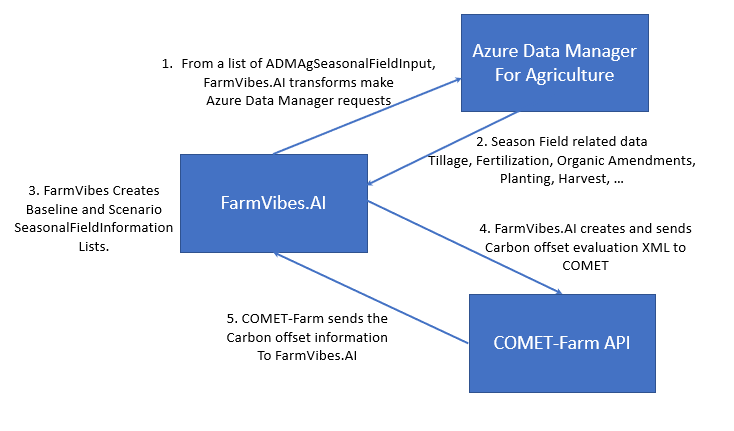

### Micromamba environment setup
To install the required packages, see [this README file](../README.md). You can activate the environment with the following command:


```bash
$ micromamba activate farmvibes-ai
```

## Import Required Libraries

In [1]:
from typing import List

from vibe_core.client import FarmvibesAiClient, get_default_vibe_client
from vibe_core.data import ADMAgSeasonalFieldInput

## Define a list of objects to be retrieved from ADMAg

In the next cells, we define the `ADMAgSeasonalFieldInput` lists and the workflow parameters. Please, check the notebooks [azure_data_manager_for_agriculture_example](./azure_data_manager_for_agriculture_example.ipynb) and [carbon/whatif](../carbon/whatif.ipynb) for details related to Microsoft Azure Data Manager for Agriculture and COMET-Farm API access variables.

In [2]:
# ADMAg host
BASE_URL = ""
# ADMAg client id
CLIENT_ID = ""
# ADMAg client secret
CLIENT_SECRET = ""
# ADMAg authority
AUTHORITY = ""
# ADMAg default scope
DEFAULT_SCOPE = ""
# Party ADMAg ID
PARTY_ID = ""
# A list of seasonal field scenarios ids from ADMAg
SCENARIO_IDS = []
# A list of baseline seasonal field ids from ADMAg
BASELINE_IDS = []
# COMET Registered Email. Visit the site https://comet-farm.com/ to
# check how to get registered emails.
COMET_REGISTERED_EMAIL = ""
# NGROK Authorization token. Check ngrok website to check how to obtain
# an authorization token.
NGROK_AUTH_TOKEN = ""

In [3]:
def get_seasonal_field_inputs(
    party_id: str,
    seasonal_field_ids: List[str]
) -> List[ADMAgSeasonalFieldInput]:
    return [
        ADMAgSeasonalFieldInput(
            party_id=party_id,
            seasonal_field_id=seasonal_field_id
        )
        for seasonal_field_id in seasonal_field_ids
    ]

baseline_admag_inputs = get_seasonal_field_inputs(PARTY_ID, BASELINE_IDS)
scenario_admag_inputs = get_seasonal_field_inputs(PARTY_ID, SCENARIO_IDS)

### Get FarmVibes.AI Client

In [4]:
client: FarmvibesAiClient = get_default_vibe_client()

# Azure Data Manager for Agriculture and COMET-Farm API Workflow



In [5]:
CARBON_WORKFLOW = "farm_ai/carbon_local/admag_carbon_integration"

In [6]:
client.document_workflow(CARBON_WORKFLOW)

Workflow: farm_ai/carbon_local/admag_carbon_integration

Description:

Computes the offset amount of carbon that would be sequestered in a seasonal field using        
    Microsoft Azure Data Manager for Agriculture (ADMAg) data. Derives carbon sequestration         
    information. Microsoft Azure Data Manager for Agriculture (ADMAg) and the COMET-Farm API are    
    used to obtain farming data and evaluate carbon offset.  ADMAg is capable of describing         
    important farming activities such as fertilization, tillage, and organic amendments             
    applications, all of which are represented in the data manager. FarmVibes.AI retrieves this     
    information from the data manager and builds SeasonalFieldInformation FarmVibes.AI objects.     
    These objects are then used to call the COMET-Farm API and evaluate Carbon Offset Information.

Sources:

- baseline_admag_input (vibe_core.data.farm.ADMAgSeasonalFieldInput): List of                   
    ADMAgSeasonalFieldInput to retrieve SeasonalFieldInformation objects for baseline COMET-Farm API
    Carbon offset evaluation.

- scenario_admag_input (vibe_core.data.farm.ADMAgSeasonalFieldInput): List of                   
    ADMAgSeasonalFieldInput to retrieve SeasonalFieldInformation objects for scenarios COMET-Farm   
    API Carbon offset evaluation.

Sinks:

- carbon_output (vibe_core.data.core_types.CarbonOffsetInfo): Carbon sequestration received for 
    scenario information provided as input.

Parameters:

- base_url (default: None): Azure Data Manager for Agriculture host. Please visit               
    https://aka.ms/farmvibesDMA to check how to get these credentials.

- client_id (default: None): Azure Data Manager for Agriculture client id. Please visit         
    https://aka.ms/farmvibesDMA to check how to get these credentials.

- client_secret (default: None): Azure Data Manager for Agriculture client secret. Please visit 
    https://aka.ms/farmvibesDMA to check how to get these credentials.

- authority (default: None): Azure Data Manager for Agriculture authority. Please visit         
    https://aka.ms/farmvibesDMA to check how to get these credentials.

- default_scope (default: None): Azure Data Manager for Agriculture default scope. Please visit 
    https://aka.ms/farmvibesDMA to check how to get these credentials.

- comet_support_email (default: None): Comet support email. The email used to register for a    
    COMET account. The requests are forwarded to comet with this email reference.  This email is    
    used by comet to share the information back to you for failed requests.

- ngrok_token (default: None): NGROK session token. A token that FarmVibes uses to create a     
    web_hook url that is shared with Comet in a request when running the workflow. Comet can use    
    this link to send back a response to FarmVibes.  NGROK is a service that creates temporary urls 
    for local servers. To use NGROK, FarmVibes needs to get a token from this website,              
    https://dashboard.ngrok.com/.

Tasks:

- baseline_seasonal_field_list: Generates SeasonalFieldInformation using ADMAg (Microsoft Azure 
    Data Manager for Agriculture).

- scenario_seasonal_field_list: Generates SeasonalFieldInformation using ADMAg (Microsoft Azure 
    Data Manager for Agriculture).

- admag_carbon: Computes the offset amount of carbon that would be sequestered in a seasonal    
    field using the baseline (historical) and scenario (time range interested in) information.

In [7]:
run = client.run(
    CARBON_WORKFLOW,
    "Carbon what-if scenario",
    input_data={
        "baseline_admag_input": baseline_admag_inputs,
        "scenario_admag_input": scenario_admag_inputs, # type: ignore
    },
    parameters={
        "base_url": BASE_URL,
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
        "authority": AUTHORITY,
        "default_scope": DEFAULT_SCOPE,
        "ngrok_token": NGROK_AUTH_TOKEN,
        "comet_support_email": COMET_REGISTERED_EMAIL
    }
)

run.monitor()

# Show the carbon output

In [8]:
run.output['carbon_output'][0].carbon # type: ignore

'-0.074 Mg Co2e/year'